# 2) IACOV - Model Development for Prognosis - ICU
## Strategy 2) Training using all hospitals except specific and testing with 30% of the specific hospital


Code below to import libraries when running this point forward

In [1]:
# !pip install npm nodejs

In [2]:
# !jupyter lab clean
# !jupyter lab build

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_4036\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [4]:
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [5]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome ICU to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [6]:
#22 predictors + outcome ICU + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'icu'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [7]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [8]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [9]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [10]:
import ipywidgets as widgets
from IPython.display import clear_output

In [11]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [12]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE                                                
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'
                                               ])

In [13]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [14]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Specific Hospital**

In [15]:
# !pip install ipywidgets

In [16]:
# !jupyter nbextension enable --py widgetsnbextension

In [17]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [20]:
display(dropdown_hospital)

Dropdown(index=1, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_2…

In [21]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1500, 26)

In [24]:
X_specific = df_iacov_model_lean_specific.drop(['icu'],axis=1)
X_specific.shape

(1500, 25)

In [25]:
y_specific = df_iacov_model_lean_specific['icu']
y_specific.shape

(1500,)

In [26]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [27]:
X_train_specific.shape

(1050, 25)

In [28]:
X_test_specific.shape

(450, 25)

**Filter all hospitals except the selected above**

PS: Also removed GHC hospital due to very low positive cases

In [29]:
df_iacov_model_lean = df_all_hospitals[ (df_all_hospitals.city_hospital != specific_hospital) & (df_all_hospitals.city_hospital != 'GHC_02')]
df_iacov_model_lean.shape

(4546, 26)

In [30]:
#check data without specific
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [31]:
print("Specific: " + specific_hospital )
print("(training - all hospitals) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: HC_USP
(training - all hospitals) dataset: (4546, 26)

(training - specific) dataset: (1050, 25)

(test - specific) dataset: (450, 25)


### 2.1.3) Dropping unused variables - city_hospital (All hospitals)

In [32]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(4546, 25)

In [33]:
#Preencho NAs com 0 
df_iacov_model_lean['icu'] = df_iacov_model_lean['icu'].fillna(0)
df_iacov_model_lean.icu.value_counts()

icu
0    2838
1    1708
Name: count, dtype: int64

In [34]:
#Check proportion of ICU on training data 
(df_iacov_model_lean.icu.value_counts()/len(df_iacov_model_lean.icu))*100

icu
0   62.429
1   37.571
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [35]:
df_iacov_model_lean['class'] = df_iacov_model_lean['icu'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['icu'],axis=1)

### 2.1.4) Recalculating null mean_press

In [36]:
# filtered_df.loc[1158,'sys_press'] = 50
# filtered_df.loc[1158,'dias_press'] = 100

In [37]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [38]:
#Check mean_press missing before recalculating
#column_summaries(df_iacov_model_lean)

In [39]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [40]:
#Check mean_press missing after recalculating
#column_summaries(df_iacov_model_lean)

In [41]:
#column_summaries(df_iacov_model_lean_specific)

In [42]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [43]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [44]:
x_test_specific_name = 'X_test_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_SUDESTE_SP_HC_USP.csv'

In [45]:
y_test_specific_name = 'y_icu_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_icu_SUDESTE_SP_HC_USP.csv'

In [46]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(450, 25)

In [47]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(450,)

## 2.2) Prepare Experiment 

### All hospitals except specific

In [48]:
df_iacov_model_lean.shape

(4546, 25)

In [49]:
df_iacov_model_train = df_iacov_model_lean

In [50]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)

In [51]:
#import inspect
#inspect.getsource(setup)

__Atention!__: If any Dtype is bool, cast to int32, otherwise experiment will fail

In [52]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 6045
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4546 non-null   float64
 1   male             4546 non-null   float64
 2   heart_rate       3744 non-null   float64
 3   resp_rate        3126 non-null   float64
 4   sys_press        3221 non-null   float64
 5   dias_press       3231 non-null   float64
 6   mean_press       3561 non-null   float64
 7   temp             3380 non-null   float64
 8   hemoglobin       3929 non-null   float64
 9   platelets        3912 non-null   float64
 10  hematocrit       3482 non-null   float64
 11  red_cells_count  3362 non-null   float64
 12  hcm              3463 non-null   float64
 13  rdw              3463 non-null   float64
 14  mcv              3469 non-null   float64
 15  leukocytes       3913 non-null   float64
 16  neutrophil       2582 non-null   float64
 17  lymphocytes      32

In [53]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(4546, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [56]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [57]:
X_train.shape

(3972, 22)

In [58]:
X_test.shape

(1364, 22)

In [59]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [60]:
seed

42

### Filtering only 5 pre-selected models

In [61]:
# print(inspect.getsource(compare_models))

In [62]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.878400,0.942500,0.911400,0.845400,0.855500,0.882300,0.756800,0.000100,0.023800,0.631500
1,Light Gradient Boosting Machine,0.873900,0.937800,0.902300,0.845400,0.854200,0.877400,0.747700,0.151400,0.367700,0.618600
2,CatBoost Classifier,0.863500,0.933400,0.884700,0.842400,0.848900,0.866300,0.727100,0.257700,0.272400,0.592500


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [63]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.889,0.962,0.899,0.879,0.882,0.890,0.779,0.000,0.000,0.689
1,0.869,0.949,0.874,0.864,0.866,0.870,0.739,0.000,0.000,0.625
2,0.892,0.960,0.894,0.889,0.890,0.892,0.783,0.000,0.004,0.681
3,0.869,0.941,0.879,0.859,0.862,0.871,0.738,0.000,0.000,0.594
4,0.889,0.950,0.904,0.874,0.878,0.891,0.778,0.000,0.000,0.657
5,0.869,0.939,0.899,0.838,0.848,0.873,0.738,0.000,0.000,0.595
6,0.894,0.960,0.919,0.869,0.875,0.897,0.788,0.000,0.000,0.685
7,0.849,0.942,0.894,0.804,0.819,0.855,0.698,0.000,0.000,0.578
8,0.904,0.963,0.914,0.894,0.896,0.905,0.809,0.000,0.001,0.693
9,0.874,0.957,0.924,0.824,0.839,0.880,0.748,0.000,0.000,0.648


In [64]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.879,0.962,0.945,0.814,0.836,0.887,0.759,0.000,0.000,0.626
1,0.877,0.954,0.915,0.839,0.851,0.881,0.754,0.000,0.000,0.623
2,0.887,0.958,0.955,0.818,0.841,0.894,0.773,0.000,0.000,0.610
3,0.872,0.954,0.920,0.823,0.839,0.878,0.743,0.000,0.000,0.587
4,0.867,0.952,0.909,0.823,0.838,0.872,0.733,0.000,0.000,0.584
5,0.846,0.938,0.909,0.783,0.808,0.856,0.693,0.000,0.000,0.499
6,0.877,0.953,0.924,0.829,0.843,0.882,0.753,0.000,0.000,0.587
7,0.836,0.941,0.914,0.759,0.790,0.848,0.673,0.000,0.000,0.476
8,0.882,0.964,0.965,0.799,0.827,0.890,0.763,0.000,0.000,0.638
9,0.851,0.956,0.950,0.754,0.793,0.864,0.703,0.000,0.000,0.560


In [65]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.902,0.959,0.940,0.864,0.874,0.906,0.804,0.506,0.608,0.699
1,0.897,0.951,0.909,0.884,0.887,0.898,0.794,0.475,0.963,0.668
2,0.869,0.941,0.894,0.843,0.852,0.873,0.738,0.721,0.800,0.628
3,0.894,0.938,0.909,0.879,0.883,0.896,0.788,0.004,0.165,0.633
4,0.872,0.935,0.894,0.849,0.856,0.875,0.743,0.043,0.098,0.610
5,0.849,0.907,0.894,0.803,0.820,0.856,0.698,0.000,0.000,0.532
6,0.889,0.942,0.914,0.864,0.870,0.892,0.778,0.000,0.123,0.641
7,0.829,0.917,0.884,0.774,0.795,0.837,0.657,0.000,0.000,0.526
8,0.909,0.953,0.950,0.869,0.878,0.913,0.819,0.188,0.599,0.681
9,0.872,0.942,0.944,0.799,0.824,0.880,0.743,0.000,0.226,0.628


### Select best algorithm based on AUC in predicts 
##### In previous code (death) this title was indicating that this selection was being done in test data, however it seems that it is based on training

In [66]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.819,0.886,0.723,0.877,0.779,0.750,0.608,0.000,0.000,0.421


In [67]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.800,0.898,0.809,0.795,0.703,0.752,0.586,0.000,0.000,0.359


In [68]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.815,0.900,0.771,0.840,0.744,0.757,0.607,0.000,0.000,0.455


### Best model

In [69]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
#preds = preds_cat
#preds = preds_lgb
preds = preds_xgb

In [70]:
npv(y_test, preds['Label'])

0.8595438175270108

In [71]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.88', '0.92']

,,
,,
Ground Truth Prevalence,. . .,0.375
Test set Prevalence,. . .,0.389
True positive rate (recall),. . .,0.771
False positive rate,. . .,0.160
Positive predictive value (precision),. . .,0.744
True negative rate (specificity),. . .,0.840
False negative rate,. . .,0.229
Negative predictive value,. . .,0.860
Positive likelihood ratio (bigger is better),. . .,4.833


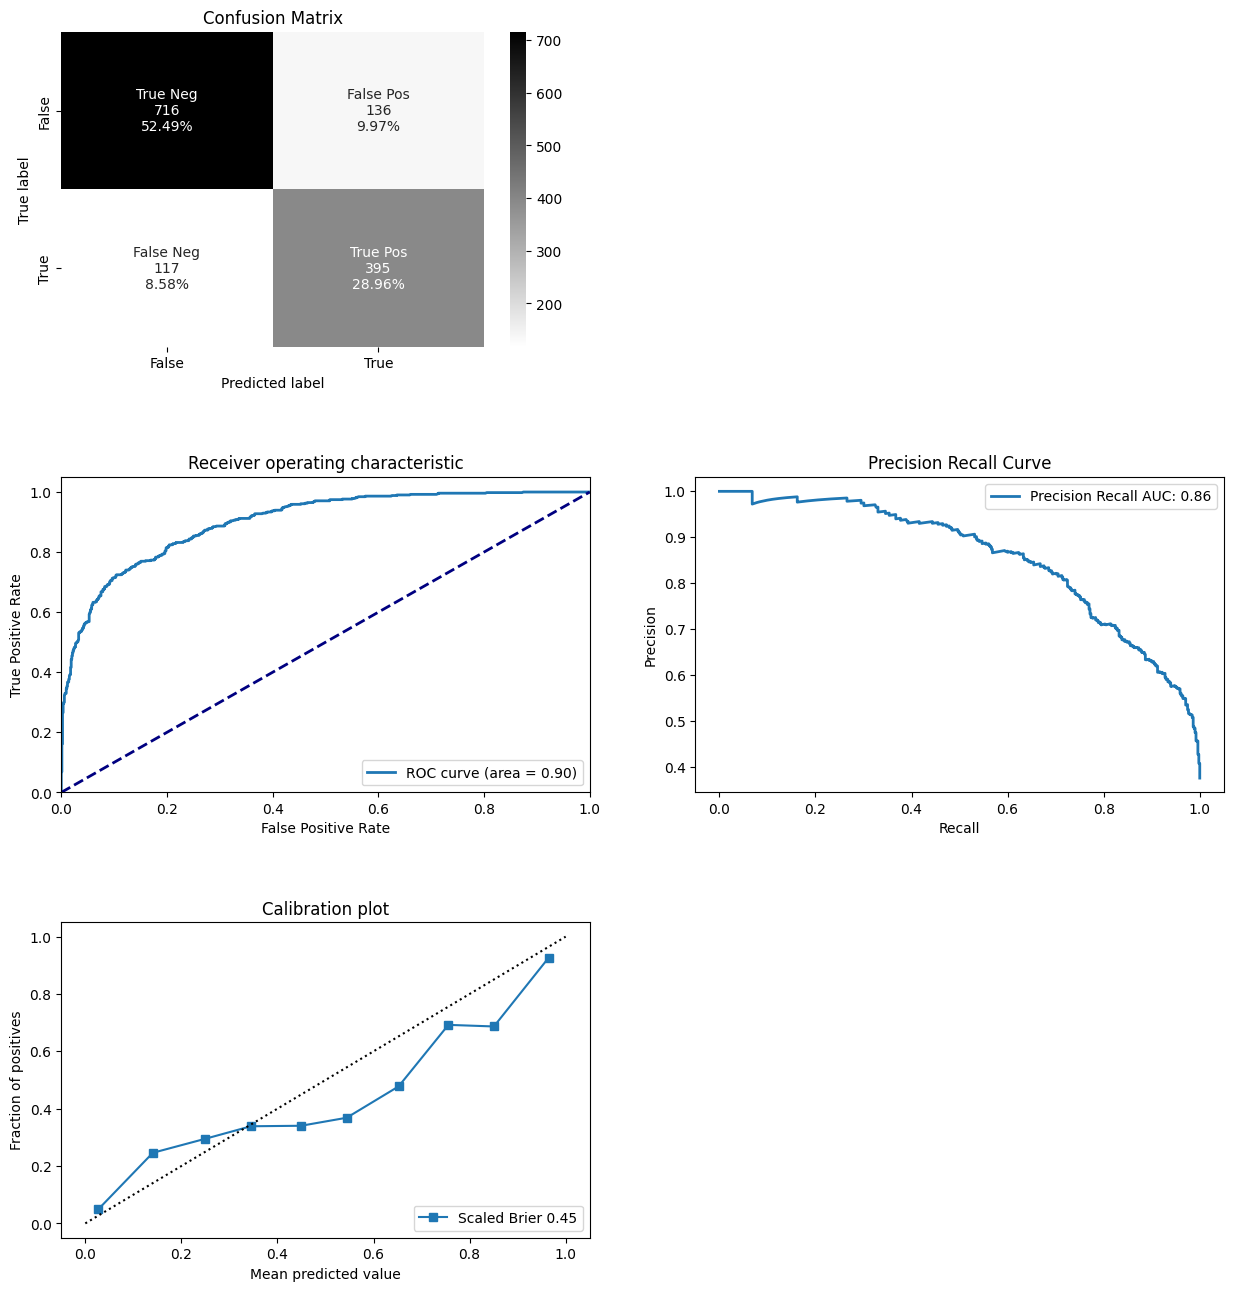

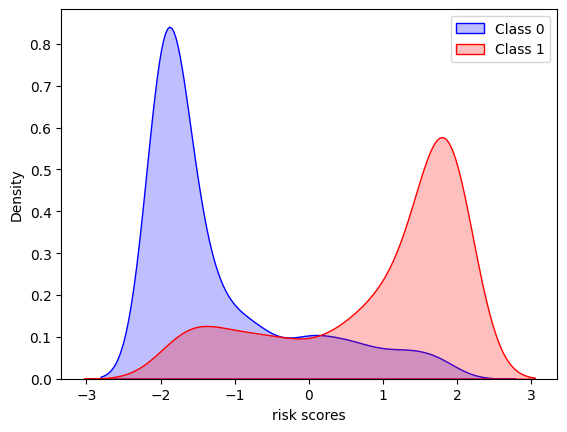

,,
,,
Ground Truth Prevalence,. . .,0.375
Test set Prevalence,. . .,0.389
True positive rate (recall),. . .,0.771
False positive rate,. . .,0.160
Positive predictive value (precision),. . .,0.744
True negative rate (specificity),. . .,0.840
False negative rate,. . .,0.229
Negative predictive value,. . .,0.860
Positive likelihood ratio (bigger is better),. . .,4.833


In [72]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

In [73]:
# evaluate_model(xgbtuned)

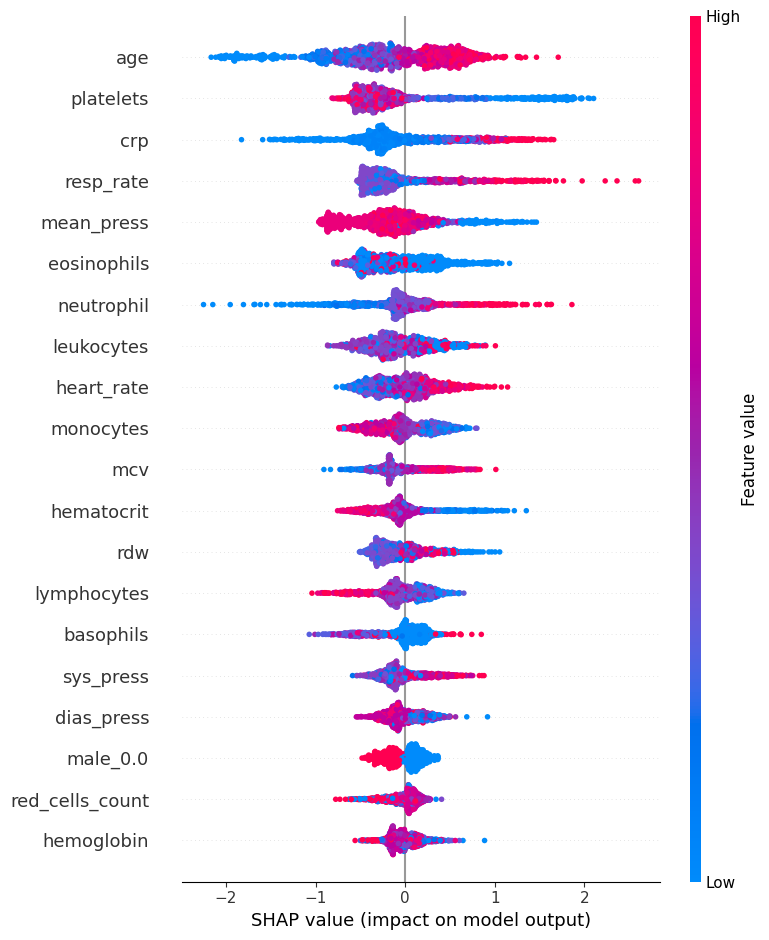

In [74]:
#interpret_model(cattuned)
#interpret_model(lgbmtuned)
interpret_model(xgbtuned)

In [75]:
# plot_model(lgbmtuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [76]:
#final_model = finalize_model(cattuned)
#final_model = finalize_model(lgbmtuned)
final_model = finalize_model(xgbtuned)

### 2.3.2) Using model to predict unseen outcome

In [77]:
str(final_model.__class__.__name__)

'XGBClassifier'

In [78]:
final_model_name = str(final_model.__class__.__name__) + '_all_vs_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'XGBClassifier_all_vs_one_SUDESTE_SP_HC_USP'

In [79]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


# Use the saved model to predict on specific hospital
## ALL_EXCEPT_ONE is the name of this strategy

In [80]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)
all_except_one_model_pkl = final_model_name + ".pkl"
prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

loaded: XGBClassifier_all_vs_one_SUDESTE_SP_HC_USP


In [81]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(450, 25)

In [82]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["icu"]
y_test_single.shape

(450,)

In [83]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
2326,HC_USP,71.000,0.000,70.000,25.000,97.000,52.000,66.985,36.500,11.000,311000.000,35.000,NaN,27.700,13.900,87.300,15670.000,14180.000,1110.000,0.010,NaN,0.370,1.492,SUDESTE,SP
1933,HC_USP,21.000,0.000,106.000,22.000,117.000,71.000,86.318,36.000,NaN,159000.000,NaN,NaN,29.300,13.400,83.600,8980.000,8350.000,270.000,0.090,NaN,0.270,2.664,SUDESTE,SP
1267,HC_USP,49.000,1.000,79.000,36.000,103.000,61.000,74.986,37.700,NaN,337000.000,NaN,NaN,28.500,14.600,87.500,8410.000,6810.000,1220.000,0.010,NaN,0.370,3.107,SUDESTE,SP
1877,HC_USP,52.000,0.000,141.000,25.000,166.000,102.000,123.312,37.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,SP
1031,HC_USP,75.000,1.000,74.000,28.000,120.000,70.000,86.650,33.600,NaN,117000.000,NaN,NaN,29.700,15.700,83.400,8110.000,7100.000,470.000,0.000,NaN,0.540,NaN,SUDESTE,SP


In [84]:
X_test_single["class"] = y_test_single

In [85]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [86]:
X_test_single_transformed = prep_pipe_all_except_one.fit_transform(X_test_single)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Numeric
resp_rate,Numeric
sys_press,Numeric
dias_press,Numeric
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Numeric


In [87]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [88]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [89]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0'],
      dtype='object')

In [90]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['eosinophils', 'male_0.0', 'red_cells_count']

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [91]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [92]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'eosinophils', 'male_0.0', 'red_cells_count'],
      dtype='object')

In [93]:
X_test_single_transformed.shape

(450, 22)

In [94]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

**Reorder columns**

In [95]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(450, 22)

0.7196281378793555


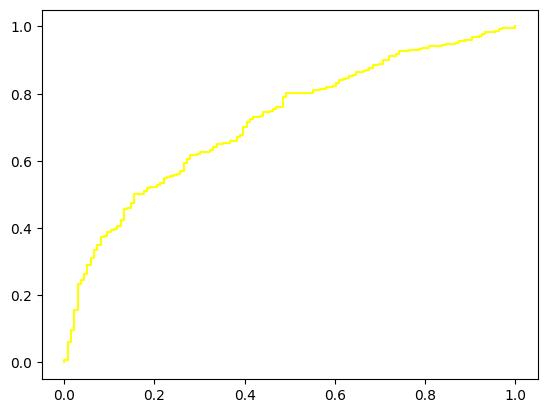

In [96]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = all_except_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - LightGBM - AUC " +  str(auc_ind), color="yellow")

In [97]:
y_pred = all_except_one_model.predict(X_test_single_transformed)

In [98]:
y_test_single.value_counts()

icu
1    314
0    136
Name: count, dtype: int64

,,
,,
Ground Truth Prevalence,. . .,0.698
Test set Prevalence,. . .,0.338
True positive rate (recall),. . .,0.427
False positive rate,. . .,0.132
Positive predictive value (precision),. . .,0.882
True negative rate (specificity),. . .,0.868
False negative rate,. . .,0.573
Negative predictive value,. . .,0.396
Positive likelihood ratio (bigger is better),. . .,3.224


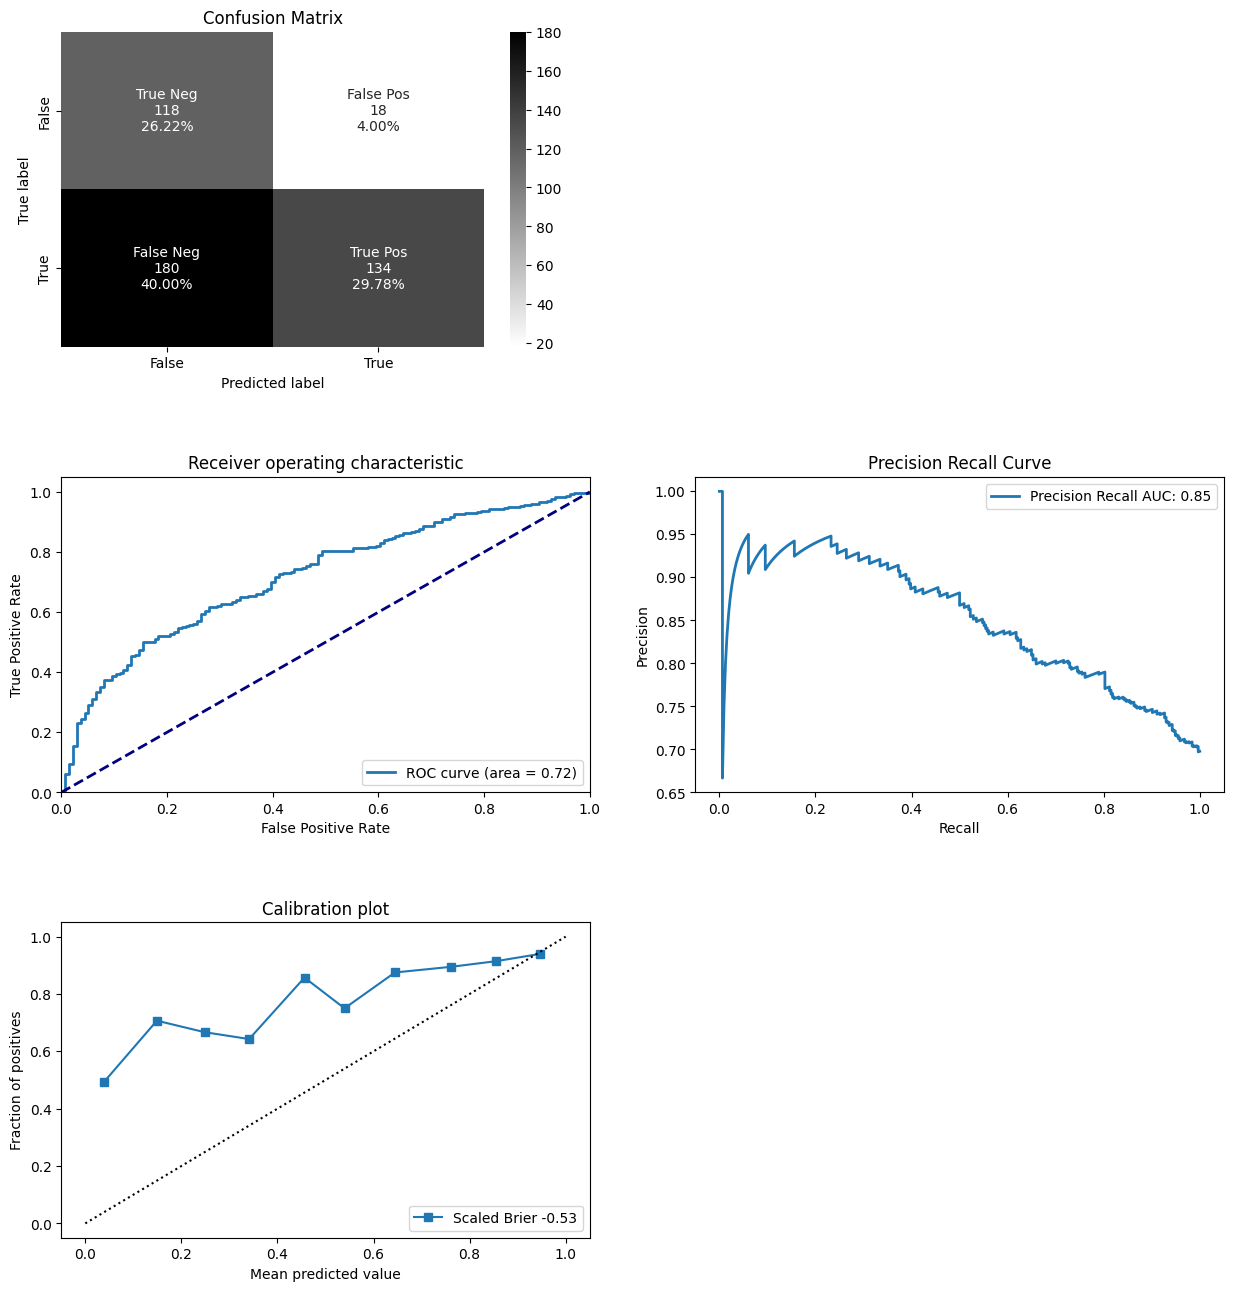

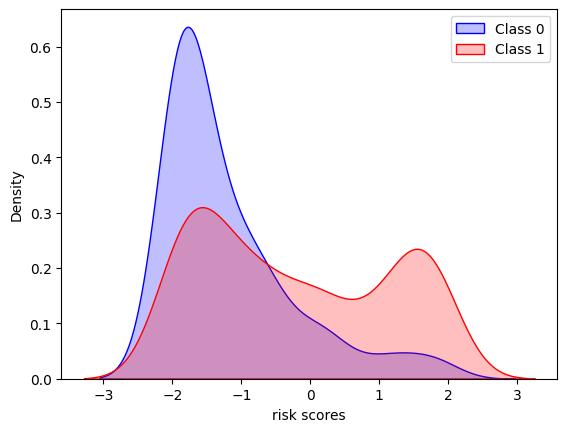

,,
,,
Ground Truth Prevalence,. . .,0.698
Test set Prevalence,. . .,0.338
True positive rate (recall),. . .,0.427
False positive rate,. . .,0.132
Positive predictive value (precision),. . .,0.882
True negative rate (specificity),. . .,0.868
False negative rate,. . .,0.573
Negative predictive value,. . .,0.396
Positive likelihood ratio (bigger is better),. . .,3.224


In [99]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [100]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.7196281378793555

In [101]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.67', '0.77']

In [102]:
#recall
tpr(y_test_single, y_pred)

0.4267515923566879

In [103]:
#specificity
tnr(y_test_single, pd.Series(y_pred))

0.8676470588235294

In [104]:
#accuracy
accuracy(y_test_single, y_pred)

0.56

In [105]:
ppv(y_test_single, y_pred)

0.881578947368421

In [106]:
npv(y_test_single, y_pred)

0.3959731543624161

# End of File